# IMDS Computer Workshop 4
### *By Jeffrey Giansiracusa - Michaelmas 2023*


This worksheet covers the content of lectures:

    4.1 Vectors and vector spaces
    4.2 Dot product
    4.3 Projections

Key points for you to learn:

* Vectors, addition and scalar multiplication
* The dot product and how we use it to measure lengths and angles
* Projection of vectors onto a line


# Initialization code to run before you start your work

Click on the cell below and then type Shift-Return to execute it.

In [1]:
import numpy as np
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()


# Input is a list of 2d vectors to be plotted.
def Plot2dVectors(list_of_endpoints):   
    p = figure(width=600, height=600, title="Vectors!")
    for vect in list_of_endpoints:
        xcoords = [0,vect[0]]
        ycoords = [0,vect[1]]
        p.line(xcoords, ycoords, line_width=2)
        p.circle([vect[0]], [vect[1]], color='red', size=6)
    show(p)

# Input is a list of 3d vectors
# This will draw the vectors with shadows and vertical rise indicators
def Plot3dVectors(list):       
    ax = plt.axes(projection = '3d')
    for vect in list:
        ax.plot([0,vect[0]], [0,vect[1]], [0,vect[2]],color='blue')
        ax.plot([0,vect[0]], [0,vect[1]], [0,0],color='grey')
        ax.plot([vect[0],vect[0]], [vect[1],vect[1]], [0,vect[2]], '--', color='grey')
    ax.plot([0,0], [-10,10], 'g--')
    ax.plot([-10,10], [0, 0], 'g--')
    plt.draw()
    plt.show()    

def Plot3dDots(list):       
    limit=20
    plt.figure(figsize=(10, 8), dpi=80)
    ax = plt.axes(projection = '3d')
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)

    # Draw the shadow
    ax.scatter3D([item[0] for item in list], [item[1] for item in list], [-20 for item in list], color='grey')

    # Draw the coordinate axes
    ax.plot([0,0], [-limit,limit], [0,0], 'g--')
    ax.plot([-limit,limit], [0, 0], [0,0], 'g--')
    ax.plot([0,0], [0, 0], [-limit,limit], 'g--')

    # Now draw the points
    ax.scatter3D([item[0] for item in list], [item[1] for item in list], [item[2] for item in list], c=[item[2] for item in list])

    plt.draw()
    plt.show()   

Loading BokehJS ...

### If you have Holoviews and Plotly installed and working,
then you can get an interactive 3d view using the fancy version defined below.

In [2]:

import holoviews as hv
from holoviews import dim, opts
hv.extension('plotly')

def FancyPlot3dVectors(list):
    xcoords=[]
    ycoords=[]
    zcoords=[]
    colorlist=[]
    for vect in list:
        steps = np.mgrid[0:100]*0.01
        x = steps*vect[0]
        y = steps*vect[1]
        z = steps*vect[2]
        xcoords += [val for val in x]
        ycoords += [val for val in y]
        zcoords += [val for val in z]
        colorlist += [(1-val) for val in steps]
    xcoords = np.array(xcoords)
    ycoords = np.array(ycoords)
    zcoords = np.array(zcoords)
    return hv.Scatter3D((xcoords, ycoords, zcoords)).opts(cmap='fire', color=colorlist, size=5, width=800, height=800)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

# -----------------------------------------------------
# Now some quick basics in Python


We can easily do basic mathematical operations:

* addition and subtraction: + and -
* multiplication:  *
* division: /
* powers x^y:  math.pow(x,y)
* useful functions:  math.exp(), math.sqrt(), math.log(), etc
* trig functions: math.sin(), math.cos(), math.tan(), math.asin(), math.acos(), math.atan()  (all in radians)


### Vectors

Python lists are okay for storing data, but to do mathematics gracefully, it is helpful to convert them into vectors for use with NumPy. As we saw earlier, the command np.array(...) turns a list of numbers into a NumPy vector.

In [3]:
U = np.array( [1,2] )   
V = np.array( [2,10] )

A = [5.1, 6.8, 9, 10]
W = np.array(A)

print(U,V,W)

[1 2] [ 2 10] [ 5.1  6.8  9.  10. ]


Now we can do operations with vectors, such as addition and multiplication by a scalar.

In [4]:
print('U =',U)
print('V =',V)
print('U+V =',U + V)
print('4U =',4*U)

U = [1 2]
V = [ 2 10]
U+V = [ 3 12]
4U = [4 8]


A linear combination of vectors is thus very easy with NumPy:

In [5]:
U = np.array([1,2, 3])   
V = np.array([4,5,6])
W = np.array([7,8,9])

10*U + 2*V - 5*W 

array([-17, -10,  -3])

A useful trick with NumPy is to apply some mathematical operation to every element in a vector.

For example, 
* U+1 
adds 1 to each element of U, and
*  U\**2
squares each element of U.

In contrast, if you wanted to square every element in a list *without NumPy*, then you would need a for loop, like this:
* ListOfSquares = [x\**2 for x in ListOfNumbers]


We can also apply certain mathematical functions to each element in a vector.  For example if you want to take the cosine of every number in a vector, you can use

* np.cos(U)

Note that we have to use np.cos instead of math.cos because math.cos doesn't know how to work with vectors.

There is more.  If U+V means add each element of U to the corresponding element of V, can you guess what U\**V or U/V might do?  If you're not sure, go ahead and try it below.



In [ ]:
# code here

### Use U @ V for the dot product of vectors
NumPy has an operator that automatically computes the dot product of two vectors (as long as they both have the same length).
Use U @ V to compute $\vec{U}\cdot \vec{V}$.

(Next week we'll see that the @ operator is also used for matrix multiplication.)

### Visualisations

In the initialisation block at the top, there are some easy-to-use plotting functions defined for you.

**Plot2dVectors(...)** takes a list of 2d (x,y) vectors as input (the vectors can be np.arrays or simply Python lists of numbes) and draws them in the plane.

**Plot3dvectors(...)** does the same in 3d.  

Making sense of 3d plots is sometimes difficult, and it can be useful to have a plot that you can rotate around and look at from different directions.  if **Plotly** is working for you, you can use the 'fancy' version instead

**FancyPlot3dVectors(...)**



In [6]:
# An example of 2d plotting

vect1 = [2, 5]
vect2 = [5,-4]
vect3 = [-4,0]

list_of_vectors = [vect1, vect2, vect3]
Plot2dVectors(list_of_vectors)



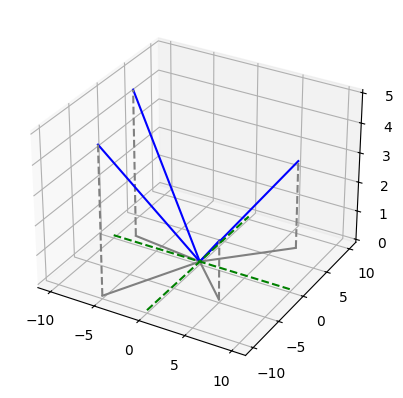

In [7]:
# An example of 3d plotting.
# The input is a list containing some number of 3d vectors [x,y,z] (as Python lists or np.array objects)

Plot3dVectors( [[7,7,3], [5,-5,2], [-8,1,5], [-5, -10, 5]] )

In [8]:
FancyPlot3dVectors( [[7,7,3], [5,-5,2], [-8,1,5], [-5, -10, 5]] )


:Scatter3D   [x,y,z]

---
#  Now it is your turn to do work on some exercises 


---
### Exercise 1

1. What is the length of the vector $\vec{v}=(1,2)$?  Use the dot product.
2. What is the angle between the vectors $\vec{u}=(3,0)$ and $\vec{v}$? Use the dot product. 
3. What is the angle between the vectors $\vec{u}$ and $\vec{w}=(-1,2)$?
4. Now find the angle between the 3d vectors (5,1,0) and (-4,2,7).

In [9]:
# Write some code here
# Define the vectors
v = np.array([1, 2])
u = np.array([3, 0])
w = np.array([-1, 2])
v3d = np.array([5, 1, 0])
w3d = np.array([-4, 2, 7])

# 1. Length of vector v using the dot product (magnitude)
length_v = np.sqrt(np.dot(v, v))
print("1. Length of vector v:", length_v)

# 2. Angle between vectors u and v using the dot product
dot_product_uv = np.dot(u, v)
magnitude_u = np.sqrt(np.dot(u, u))
magnitude_v = np.sqrt(np.dot(v, v))
cosine_theta_uv = dot_product_uv / (magnitude_u * magnitude_v)
angle_uv = np.arccos(cosine_theta_uv)  # in radians
angle_uv_degrees = np.degrees(angle_uv)  # in degrees
print("2. Angle between vectors u and v (degrees):", angle_uv_degrees)

# 3. Angle between vectors u and w using the dot product
dot_product_uw = np.dot(u, w)
magnitude_w = np.sqrt(np.dot(w, w))
cosine_theta_uw = dot_product_uw / (magnitude_u * magnitude_w)
angle_uw = np.arccos(cosine_theta_uw)  # in radians
angle_uw_degrees = np.degrees(angle_uw)  # in degrees
print("3. Angle between vectors u and w (degrees):", angle_uw_degrees)

# 4. Angle between 3D vectors v3d and w3d using the dot product
dot_product_v3d_w3d = np.dot(v3d, w3d)
# Calculate magnitude using numpy's norm function
magnitude_v3d = np.linalg.norm(v3d)
magnitude_w3d = np.linalg.norm(w3d)
cosine_theta_3d = dot_product_v3d_w3d / (magnitude_v3d * magnitude_w3d)
angle_3d = np.arccos(cosine_theta_3d)  # in radians
angle_3d_degrees = np.degrees(angle_3d)  # in degrees
print("4. Angle between 3D vectors (degrees):", angle_3d_degrees)

1. Length of vector v: 2.23606797749979
2. Angle between vectors u and v (degrees): 63.43494882292201
3. Angle between vectors u and w (degrees): 116.56505117707799
4. Angle between 3D vectors (degrees): 115.14895113310558


4. Write a function **Proj(vect1, vect2)** that calculates and returns the projection of vect1 onto vect2.  Make sure it works in both 2d and 3d (and higher dimensions).
5. Use your function to calculate the projection of $\vec{u}$ onto $\vec{v}$, and the projection of $\vec{w}$ onto $\vec{v}$.

In [10]:
def Proj(vect1, vect2):
    # put some code here
    # Calculate the dot product of vect1 and vect2
    dot_product = np.dot(vect1, vect2)
    # Calculate the squared magnitude of vect2
    magnitude_squared = np.dot(vect2, vect2)
    # Calculate the projection of vect1 onto vect2
    projection = (dot_product / magnitude_squared) * vect2
    return projection

In [12]:
# Calculate the projection of u onto v
projection_uv = Proj(u, v)
print("Projection of u onto v:", projection_uv)

# Calculate the projection of w onto v
projection_wv = Proj(w, v)
print("Projection of w onto v:", projection_wv)

Projection of u onto v: [0.6 1.2]
Projection of w onto v: [0.6 1.2]


Here is some code to draw a plot and check that you code is working correctly in 2d.

In [13]:
def Plot2dProjection(vect1, vect2):   
    p = figure(width=800, height=600, title="Vectors!")
    vect3 = Proj(vect1, vect2)
    for vect in [vect1, vect2, vect3]:
        xcoords = [0,vect[0]]
        ycoords = [0,vect[1]]
        p.line(xcoords, ycoords, line_width=2, color='blue')
        p.circle([vect[0]], [vect[1]], color='red', size=6)
    p.line([vect3[0], vect1[0]], [vect3[1], vect1[1]], line_width=2, color='grey')
    show(p)

In [14]:
# Test your projection function here.
Plot2dProjection(u, v)

---
# Exercise 2

The equation $L_1: 5x - 2y = 0$ defines a line in the plane $\mathbb{R}^2$.  

 1. Find a few points on $L_1$. 
 2. Use your Proj function to find the distance from the point (10,10) to $L_1$.
 

In [16]:
# code here
# Define the point (10, 10)
point = np.array([10, 10])

# Define the normal vector to the line L1
normal_vector = np.array([5, -2])

# Calculate the projection of the point onto the normal vector
projection = Proj(point, normal_vector)

# Calculate the distance between the point and the line
distance = np.linalg.norm(point - projection)

print("Distance from (10, 10) to L1:", distance)

Distance from (10, 10) to L1: 12.99867367239363


 Now consider the line $L_2: 4x + 3y = 8$. Note that this line doesn't pass through the origin.
 
 3. Find a couple of points on this line.

If $\vec{v}=(a,b)$ is a vector that lies on the line $L_2$, then translating by -$\vec{v}$ should give us a line that passes through the origin.  

5. Find the distance from the point (10,10) to the line $L_2$. To do this, you can translate everything by $-\vec{v}$ and then use the same method as you used in part 2. 

---
# Exercise 3

We have some hippos in the zoo and the vet comes to check on them.  She measures weight W (in tonnes) and body circumferences C (in meters).  In a healthy hippo we expect these numbers to be related:
$$ 3W = 2C. $$

The hippos in give the following (W,C) vectors.

* Hippo 1: (5, 7.5)
* Hippo 2: (6, 7)
* Hippo 3: (4.5, 6.75)
* Hippo 4: (6.6, 9.9)

Tasks: 
1. Plot these data points.
2. The vet suspects that one hippo is unwell! Which one?  

*Note:  This is a little different from the usual linear regression setup where one variable is independent and the other is dependent.  Here W and C are related, but we shouldn't consider one dependent.  Instead, think of this as being about distance to a line.*

3. Use projection to find out what its weight and circumference should probably be.
4. Can you find a vector $\vec{v}$ such that a hippo is healthy if the dot product $\vec{v} \cdot (W,C)$ is approximately zero?

In [ ]:
h1 = [5, 7.4]
h2 = [6.3, 7]
h3 = [4.5, 6.75]
h4 = [6.6, 9.7]

# code here


In [ ]:
[100/78, 200/160]

---

# Exercise 4

In machine learning and data science, we often have vectors where the length doesn't matter much but the direction is important.  In a situation like this, if we want to measure how similar two vectors are, we might just look at the angle between the vectors.  In fact, we can use the cosine of the angle as a measure of the similariy.  A cosine of 1 means the vectors point in the same direction, 0 means they are orthogonal, and -1 means they point in opposite directions.  This is called **cosine similarity**.

One example where cosine similarity gets used frequently is in text analysis.  We might compare the relative frequencies of words or letters.  Does one document use consonants more than vowels when compared to another?  Suppose one text has 100 consonants and 78 vowels, while another has 200 consonants and 160 vowels.  The second text is twice as long, so the distance between the points (100,78) and (200,160) might be large, but the ratios 100/78 = 1.28 and 200/160 = 1.25 are very close.  Eventhough their lengths are very different, these two vectors point in nearly the same direction and so their cosine siilarity is close to 1.  


Here is an example.  Consider the following poems.

### 1 

*Some primal termite knocked on wood

And tasted it, and found it good!

And that is why your Cousin May

Fell through the parlor floor today.*

### 2

*When I was One,

I had just begun.

When I was Two,

I was nearly new.

When I was Three

I was hardly me.

When I was Four,

I was not much more.

When I was Five,

I was just alive.

But now I am Six,

I'm as clever as clever,

So I think I'll be six now for ever and ever. *

### 3

And death shall have no dominion.

Dead man naked they shall be one

With the man in the wind and the west moon;

When their bones are picked clean and the clean bones gone,

They shall have stars at elbow and foot;

Though they go mad they shall be sane,

Though they sink through the sea they shall rise again;

Though lovers be lost love shall not;

And death shall have no dominion.

And death shall have no dominion.

Under the windings of the sea

They lying long shall not die windily;

Twisting on racks when sinews give way,

Strapped to a wheel, yet they shall not break;

Faith in their hands shall snap in two,

And the unicorn evils run them through;

Split all ends up they shan’t crack;

And death shall have no dominion.

And death shall have no dominion.

No more may gulls cry at their ears

Or waves break loud on the seashores;

Where blew a flower may a flower no more

Lift its head to the blows of the rain;

Though they be mad and dead as nails,

Heads of the characters hammer through daisies;

Break in the sun till the sun breaks down,

And death shall have no dominion.

### ----------------

For each of these poems, count how many times the letters d,e, and m occur.  For example, there are two d's in the first one.  Put these numbers into a vector for each poem.

P1 = (number of d's, number of e's, number of m's) of poem 1.
P2 = same for poem 2.
P2 = same for poem 3.

Note that one poem is significantly longer than the others, so we expect any letter count to be higher for it.

Calculate the cosine similarity between each pair of P1, P2, P3.


In [ ]:
# code here
# It might be helpful to use the string.count method to count occurrences of each letter, as shown below.

a_string = "the quick brown fox"
print(a_string.count('q'))
